In [1]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import cPickle as pickle
from video_process_utils import *
HOME_DIR = "/home/bryan/clinical-video/"

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
alldata_processed =\
    pd.read_csv("data/annotations/alldata_processed_with_dev_residual.csv" )
alldata_processed['videoid'] = alldata_processed['videoid'].apply(lambda x: int(x))

In [39]:
results = []

In [40]:
target_cols = ['GDI','speed','cadence','KneeFlex_maxExtension']

for idx,target_col in enumerate(target_cols):
    target_df = alldata_processed[["videoid","side",target_col]].copy()
    predictions = pd.read_csv("./predictions/cnn_%s_predictions_best_epoch.csv" % (target_col),dtype={'videoid':int})
    predictions = predictions.merge(right=target_df,on=['videoid','side'],how='left')
    predictions['error2'] = np.square(predictions['%s_pred_corrected' % (target_col)] - predictions['%s' % (target_col)])
    for dataset in ['train','validation','test']:
        c = predictions[predictions['dataset'] == dataset].corr()['%s' % (target_col)]['%s_pred_corrected' % (target_col)]
        rmse = np.sqrt(predictions[predictions['dataset'] == dataset]['error2'].mean())
        results.append(["cnn",target_col,dataset,c,rmse,idx])

In [41]:
for mod in ['rr','rf']:
    for idx,target_col in enumerate(target_cols):
        target_df = alldata_processed[["videoid","side",target_col]].copy()
        predictions = pd.read_csv("./predictions/%s_%s_predictions.csv" % (mod,target_col),dtype={'videoid':int})
        predictions = predictions.merge(right=target_df,on=['videoid','side'],how='left')
        predictions['error2'] = np.square(predictions['%s_pred' % (target_col)] - predictions['%s' % (target_col)])
        for dataset in ['train','validation','test']:
            c = predictions[predictions['dataset'] == dataset].corr()['%s' % (target_col)]['%s_pred' % (target_col)]
            rmse = np.sqrt(predictions[predictions['dataset'] == dataset]['error2'].mean())
            results.append([mod,target_col,dataset,c,rmse,idx])

In [42]:
results_df = pd.DataFrame(results,columns=['model','target','dataset','correlation','rmse','idx'])

In [43]:
results_df[results_df['dataset'] == 'test']

,model,target,dataset,correlation,rmse,idx
2,cnn,GDI,test,0.736157,8.131117,0
5,cnn,speed,test,0.763400,0.185650,1
8,cnn,cadence,test,0.764496,0.137190,2
11,cnn,KneeFlex_maxExtension,test,0.813603,7.747732,3
14,rr,GDI,test,0.658223,8.985512,0
17,rr,speed,test,0.730750,0.194455,1
20,rr,cadence,test,0.636802,0.164201,2
23,rr,KneeFlex_maxExtension,test,0.755023,8.737566,3
26,rf,GDI,test,0.653788,9.025822,0
29,rf,speed,test,0.747236,0.189412,1


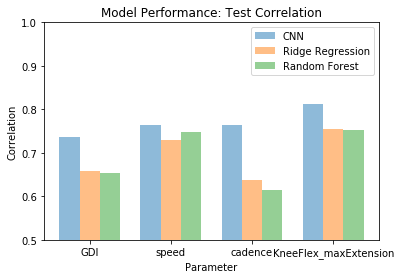

In [54]:
# Setting the positions and width for the bars
results_df_test = results_df[results_df['dataset'] == 'test'].copy().sort_values(by=['model','idx'])
pos = list(range(4))
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots()

plt.bar(pos, results_df_test[results_df_test['model'] == 'cnn']['correlation'], 
        width, 
        alpha=0.5, label='CNN');

plt.bar([p + width for p in pos], results_df_test[results_df_test['model'] == 'rr']['correlation'], 
        width, 
        alpha=0.5, label='Ridge Regression');

plt.bar([p + 2*width for p in pos], results_df_test[results_df_test['model'] == 'rf']['correlation'], 
        width, 
        alpha=0.5, label='Random Forest');

ax.set_xticks([p + width for p in pos])
ax.set_xticklabels(results_df_test['target']);
plt.xlabel("Parameter")
plt.ylabel("Correlation")
plt.legend()
plt.ylim([0.5,1]);
plt.title("Model Performance: Test Correlation")
plt.savefig("figures/corr_performance.png",dpi=600)

In [51]:
results_df_test

,model,target,dataset,correlation,rmse,idx
2,cnn,GDI,test,0.736157,8.131117,0
5,cnn,speed,test,0.763400,0.185650,1
8,cnn,cadence,test,0.764496,0.137190,2
11,cnn,KneeFlex_maxExtension,test,0.813603,7.747732,3
26,rf,GDI,test,0.653788,9.025822,0
29,rf,speed,test,0.747236,0.189412,1
32,rf,cadence,test,0.615623,0.167796,2
35,rf,KneeFlex_maxExtension,test,0.752967,8.785423,3
14,rr,GDI,test,0.658223,8.985512,0
17,rr,speed,test,0.730750,0.194455,1
